In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [76]:
file_dir = "../simulation/measurements/files"

particle_counts = [1500, 3500, 7500, 17000, 37000, 85000, 190000, 420000, 950000, 2200000, 5000000]
modes = ["computeShaders", "sequential", "parallel"]

In [77]:
# 06-06 17:17:02.384 25325 25358 I Timer   : Elapsed time: 8.342025 ms

pd_cs = pd.DataFrame(columns=["particle_count", "avg_time", "avg_time_err", "avg_time_per_particle", "avg_time_per_particle_err"])
pd_seq = pd.DataFrame(columns=["particle_count", "avg_time", "avg_time_err", "avg_time_per_particle", "avg_time_per_particle_err"])
pd_par = pd.DataFrame(columns=["particle_count", "avg_time", "avg_time_err", "avg_time_per_particle", "avg_time_per_particle_err"])

pd_cs["particle_count"] = particle_counts
pd_seq["particle_count"] = particle_counts
pd_par["particle_count"] = particle_counts

for mode in modes:
    avg_times = []
    avg_times_err = []
    avg_times_per_particle = []
    avg_times_per_particle_err = []
    for count in particle_counts:
        file = open(f"{file_dir}/logs_{count}_{mode}0.txt", "r").read()

        all_times = []
        for line in file.split("\n"):
            if "ms" in line:
                time = float(line.split("Elapsed time: ")[1].split(" ")[0])
                all_times.append(time)

        avg_time = np.mean(all_times)
        avg_time_err = np.std(all_times)
        avg_time_per_particle = avg_time / count
        avg_time_per_particle_err = avg_time_err / count

        avg_times.append(avg_time)
        avg_times_err.append(avg_time_err)
        avg_times_per_particle.append(avg_time_per_particle)
        avg_times_per_particle_err.append(avg_time_per_particle_err)

    if mode == "computeShaders":
        pd_cs["avg_time"] = avg_times
        pd_cs["avg_time_err"] = avg_times_err
        pd_cs["avg_time_per_particle"] = avg_times_per_particle
        pd_cs["avg_time_per_particle_err"] = avg_times_per_particle_err
    elif mode == "sequential":
        pd_seq["avg_time"] = avg_times
        pd_seq["avg_time_err"] = avg_times_err
        pd_seq["avg_time_per_particle"] = avg_times_per_particle
        pd_seq["avg_time_per_particle_err"] = avg_times_per_particle_err
    elif mode == "parallel":
        pd_par["avg_time"] = avg_times
        pd_par["avg_time_err"] = avg_times_err
        pd_par["avg_time_per_particle"] = avg_times_per_particle
        pd_par["avg_time_per_particle_err"] = avg_times_per_particle_err

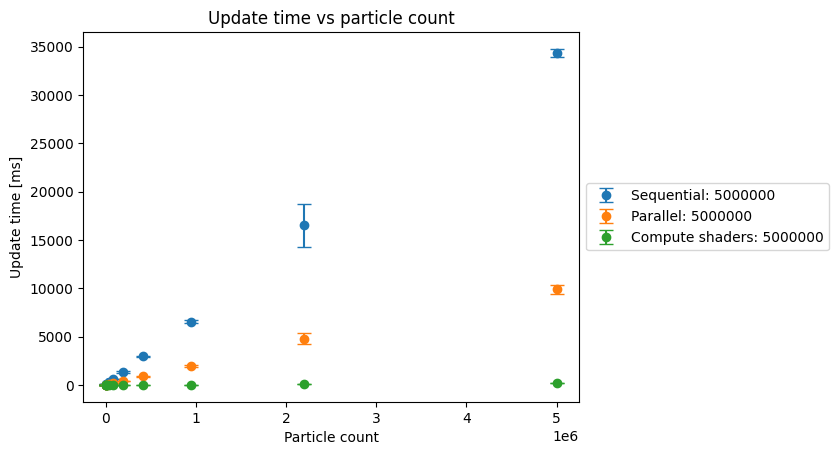

In [78]:
# Sequential
plt.errorbar(pd_seq["particle_count"], pd_seq["avg_time"], yerr=pd_seq["avg_time_err"], fmt='o', label=f"Sequential: {count}", capsize=5)

# Parallel
plt.errorbar(pd_par["particle_count"], pd_par["avg_time"], yerr=pd_par["avg_time_err"], fmt='o', label=f"Parallel: {count}", capsize=5)

# Compute shaders
plt.errorbar(pd_cs["particle_count"], pd_cs["avg_time"], yerr=pd_cs["avg_time_err"], fmt='o', label=f"Compute shaders: {count}", capsize=5)

plt.title("Update time vs particle count")
plt.xlabel("Particle count")
plt.ylabel("Update time [ms]")

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

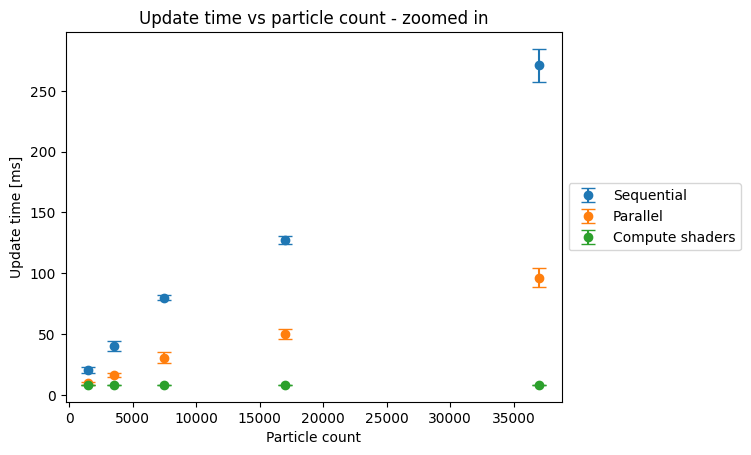

In [79]:
# Sequential
plt.errorbar(pd_seq["particle_count"][:5], pd_seq["avg_time"][:5], yerr=pd_seq["avg_time_err"][:5], fmt='o', label=f"Sequential", capsize=5)

# Parallel
plt.errorbar(pd_par["particle_count"][:5], pd_par["avg_time"][:5], yerr=pd_par["avg_time_err"][:5], fmt='o', label=f"Parallel", capsize=5)

# Compute shaders
plt.errorbar(pd_cs["particle_count"][:5], pd_cs["avg_time"][:5], yerr=pd_cs["avg_time_err"][:5], fmt='o', label=f"Compute shaders", capsize=5)

plt.title("Update time vs particle count - zoomed in")
plt.xlabel("Particle count")
plt.ylabel("Update time [ms]")

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

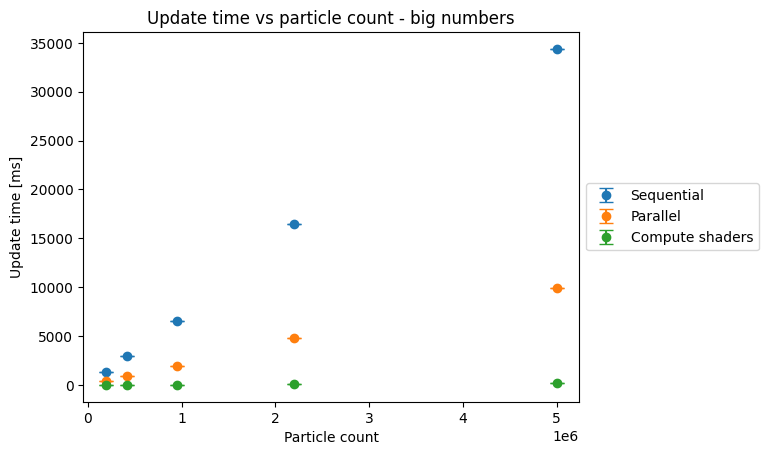

In [80]:
# Sequential
plt.errorbar(pd_seq["particle_count"][6:], pd_seq["avg_time"][6:], yerr=pd_seq["avg_time_err"][:5], fmt='o', label=f"Sequential", capsize=5)

# Parallel
plt.errorbar(pd_par["particle_count"][6:], pd_par["avg_time"][6:], yerr=pd_par["avg_time_err"][:5], fmt='o', label=f"Parallel", capsize=5)

# Compute shaders
plt.errorbar(pd_cs["particle_count"][6:], pd_cs["avg_time"][6:], yerr=pd_cs["avg_time_err"][:5], fmt='o', label=f"Compute shaders", capsize=5)

plt.title("Update time vs particle count - big numbers")
plt.xlabel("Particle count")
plt.ylabel("Update time [ms]")

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

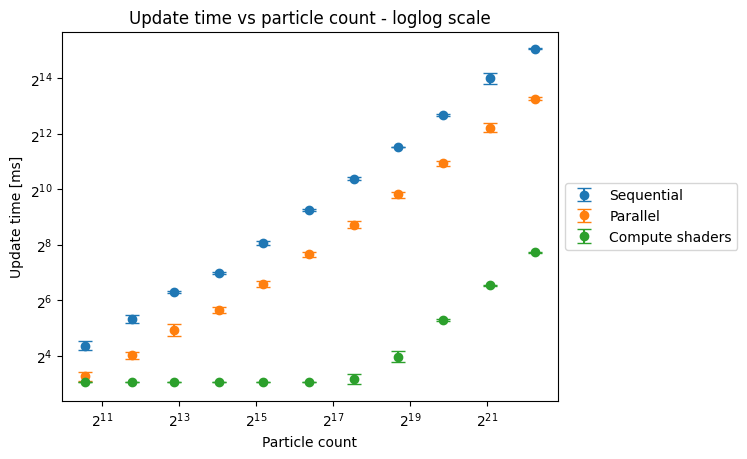

In [81]:
# Sequential
plt.errorbar(pd_seq["particle_count"], pd_seq["avg_time"], yerr=pd_seq["avg_time_err"], fmt='o', label=f"Sequential", capsize=5)

# Parallel
plt.errorbar(pd_par["particle_count"], pd_par["avg_time"], yerr=pd_par["avg_time_err"], fmt='o', label=f"Parallel", capsize=5)

# Compute shaders
plt.errorbar(pd_cs["particle_count"], pd_cs["avg_time"], yerr=pd_cs["avg_time_err"], fmt='o', label=f"Compute shaders", capsize=5)

plt.title("Update time vs particle count - loglog scale")
plt.xlabel("Particle count")
plt.ylabel("Update time [ms]")

plt.xscale('log', base=2)
plt.yscale('log', base=2)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

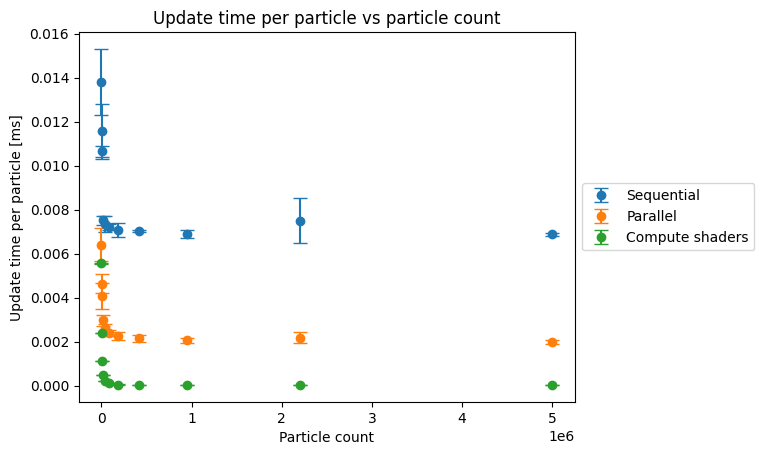

In [82]:
# Sequential
plt.errorbar(pd_seq["particle_count"], pd_seq["avg_time_per_particle"], yerr=pd_seq["avg_time_per_particle_err"], fmt='o', label=f"Sequential", capsize=5)

# Parallel
plt.errorbar(pd_par["particle_count"], pd_par["avg_time_per_particle"], yerr=pd_par["avg_time_per_particle_err"], fmt='o', label=f"Parallel", capsize=5)

# Compute shaders
plt.errorbar(pd_cs["particle_count"], pd_cs["avg_time_per_particle"], yerr=pd_cs["avg_time_per_particle_err"], fmt='o', label=f"Compute shaders", capsize=5)

plt.title("Update time per particle vs particle count")
plt.xlabel("Particle count")
plt.ylabel("Update time per particle [ms]")

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

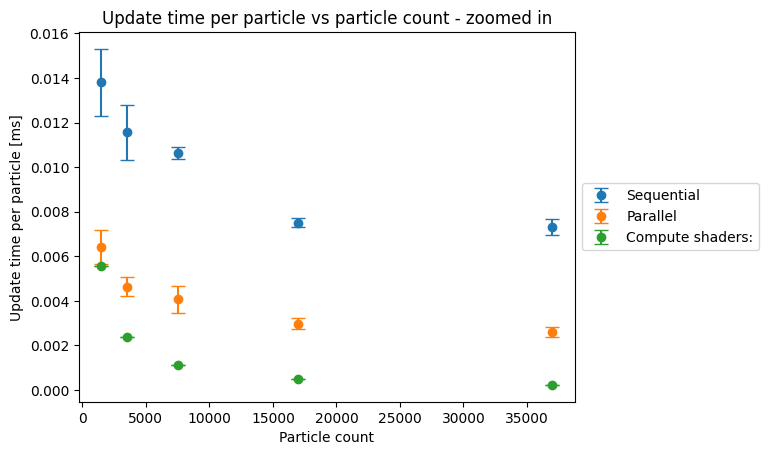

In [83]:
# Sequential
plt.errorbar(pd_seq["particle_count"][:5], pd_seq["avg_time_per_particle"][:5], yerr=pd_seq["avg_time_per_particle_err"][:5], fmt='o', label=f"Sequential", capsize=5)

# Parallel
plt.errorbar(pd_par["particle_count"][:5], pd_par["avg_time_per_particle"][:5], yerr=pd_par["avg_time_per_particle_err"][:5], fmt='o', label=f"Parallel", capsize=5)

# Compute shaders
plt.errorbar(pd_cs["particle_count"][:5], pd_cs["avg_time_per_particle"][:5], yerr=pd_cs["avg_time_per_particle_err"][:5], fmt='o', label=f"Compute shaders:", capsize=5)

plt.title("Update time per particle vs particle count - zoomed in")
plt.xlabel("Particle count")
plt.ylabel("Update time per particle [ms]")

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

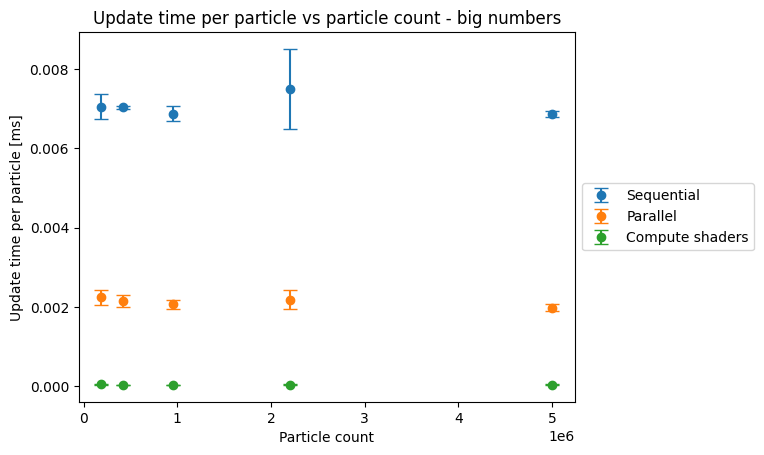

In [84]:
# Sequential
plt.errorbar(pd_seq["particle_count"][6:], pd_seq["avg_time_per_particle"][6:], yerr=pd_seq["avg_time_per_particle_err"][6:], fmt='o', label=f"Sequential", capsize=5)

# Parallel
plt.errorbar(pd_par["particle_count"][6:], pd_par["avg_time_per_particle"][6:], yerr=pd_par["avg_time_per_particle_err"][6:], fmt='o', label=f"Parallel", capsize=5)

# Compute shaders
plt.errorbar(pd_cs["particle_count"][6:], pd_cs["avg_time_per_particle"][6:], yerr=pd_cs["avg_time_per_particle_err"][6:], fmt='o', label=f"Compute shaders", capsize=5)

plt.title("Update time per particle vs particle count - big numbers")
plt.xlabel("Particle count")
plt.ylabel("Update time per particle [ms]")

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

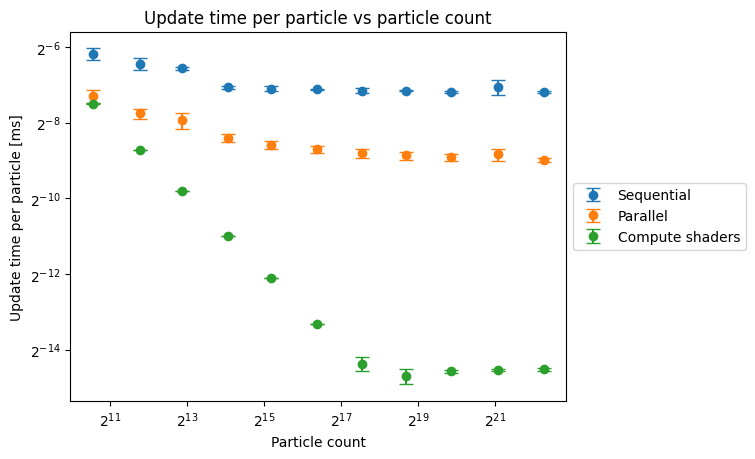

In [85]:
# Sequential
plt.errorbar(pd_seq["particle_count"], pd_seq["avg_time_per_particle"], yerr=pd_seq["avg_time_per_particle_err"], fmt='o', label=f"Sequential", capsize=5)

# Parallel
plt.errorbar(pd_par["particle_count"], pd_par["avg_time_per_particle"], yerr=pd_par["avg_time_per_particle_err"], fmt='o', label=f"Parallel", capsize=5)

# Compute shaders
plt.errorbar(pd_cs["particle_count"], pd_cs["avg_time_per_particle"], yerr=pd_cs["avg_time_per_particle_err"], fmt='o', label=f"Compute shaders", capsize=5)

plt.title("Update time per particle vs particle count")
plt.xlabel("Particle count")
plt.ylabel("Update time per particle [ms]")

plt.xscale('log', base=2)
plt.yscale('log', base=2)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()